**Reference for Template design: Anthony So**

---
---
***A. PART A : EXPERIMENT ON UNIVARIATE LINEAR REGRESSION***
---
---

**I. Load and Explore Dataset**

In [1]:
%pip install pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path1='/content/drive/MyDrive/Colab Notebooks/Data/ML/Assignment 1/cancer_us_county-testing.csv'
path2='/content/drive/MyDrive/Colab Notebooks/Data/ML/Assignment 1/cancer_us_county-training.csv'
import pandas as pd
df_test=pd.read_csv(path1)
df_train=pd.read_csv(path2)

Mounted at /content/drive


In [3]:
df=pd.concat([df_train,df_test],axis=0)

In [4]:
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,27.000000,14,187.6,415.700000,50155,4769,12.0,0.000000,"(48021.6, 51046.4]",42.6,...,42.0,27.4,12.1,85.768985,0.616890,0.042544,2.105935,51.104816,6.659013,2247
605,30.000000,9,131.6,444.600000,46961,4854,14.0,0.000000,"(45201, 48021.6]",41.3,...,40.7,30.9,15.8,96.122281,0.800164,0.307755,1.292573,49.671883,5.760870,2947
606,583.000000,258,187.5,429.400000,39907,127780,22.1,62.607607,"(37413.8, 40362.7]",36.9,...,39.8,37.9,22.7,81.407683,6.285701,4.388991,2.247924,47.875108,6.387886,1746
607,1962.667684,31,174.2,453.549422,50905,14219,9.3,0.000000,"(48021.6, 51046.4]",39.1,...,52.1,33.9,17.6,93.756201,1.658398,0.836286,0.290574,45.219595,5.893846,1822


In [5]:
'Display the dimensions (shape) of df'
df.shape

(3047, 35)

**II. DATA PREPARATION:**



**1. Descriptive statistics**

In [6]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,1523.000000
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,879.737461
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,761.500000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,1523.000000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,2284.500000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,3046.000000


In [7]:
df.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

**2. Display the observations with missing values**

In [8]:
df[df['PctSomeCol18_24'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
6,1962.667684,36,153.9,453.549422,65373,23298,10.0,0.000000,"(61494.5, 125635]",34.7,...,52.1,23.8,10.7,94.086188,1.290608,0.901657,0.685083,62.609863,8.095893,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,286.000000,122,161.1,393.000000,41736,64362,20.2,15.537118,"(40362.7, 42724.4]",35.6,...,19.5,47.2,27.5,75.956092,3.708013,1.345724,8.291742,48.647964,8.221797,102
604,27.000000,14,187.6,415.700000,50155,4769,12.0,0.000000,"(48021.6, 51046.4]",42.6,...,42.0,27.4,12.1,85.768985,0.616890,0.042544,2.105935,51.104816,6.659013,2247
605,30.000000,9,131.6,444.600000,46961,4854,14.0,0.000000,"(45201, 48021.6]",41.3,...,40.7,30.9,15.8,96.122281,0.800164,0.307755,1.292573,49.671883,5.760870,2947
606,583.000000,258,187.5,429.400000,39907,127780,22.1,62.607607,"(37413.8, 40362.7]",36.9,...,39.8,37.9,22.7,81.407683,6.285701,4.388991,2.247924,47.875108,6.387886,1746


In [9]:
df[df['PctEmployed16_Over'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
17,1780.000000,748,169.1,418.700000,44976,362895,18.4,286.584274,"(42724.4, 45201]",39.3,...,41.9,37.0,19.8,88.368622,1.084692,2.511063,2.227357,44.094095,4.213583,20
73,407.000000,126,174.0,536.200000,54924,78702,12.3,216.004676,"(54545.6, 61494.5]",39.3,...,57.3,29.0,13.8,96.528112,0.479464,0.523642,0.465171,56.068914,4.763673,91
88,1962.667684,6,141.4,453.549422,46318,2564,12.8,0.000000,"(45201, 48021.6]",41.7,...,43.7,34.5,13.3,95.465300,0.867508,0.670347,0.512618,56.003752,3.783784,111
98,33.000000,11,138.7,380.500000,82597,11065,4.6,0.000000,"(61494.5, 125635]",32.3,...,60.6,18.8,8.5,96.866485,0.360062,0.768782,1.050993,78.075397,6.102877,123
107,55.000000,25,198.5,457.800000,45413,9259,14.4,0.000000,"(45201, 48021.6]",39.6,...,44.1,37.3,18.2,96.012931,0.140086,0.452586,2.661638,51.068376,7.290533,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,27.000000,13,212.3,458.200000,36027,3618,18.3,0.000000,"(34218.1, 37413.8]",48.5,...,31.0,32.9,13.3,93.109151,1.901874,0.000000,1.323043,48.636100,6.068602,2025
583,214.000000,61,362.8,1206.900000,40207,15234,24.3,0.000000,"(37413.8, 40362.7]",40.3,...,41.0,35.8,22.5,73.964848,21.591732,0.645119,1.533803,50.012877,3.739774,1964
598,139.000000,46,156.1,528.400000,56551,17111,7.4,0.000000,"(54545.6, 61494.5]",48.7,...,41.4,37.2,14.8,97.736783,0.306477,0.229858,0.176814,56.291645,7.152406,2304
599,894.000000,325,167.4,460.900000,68405,176395,7.0,317.469316,"(61494.5, 125635]",41.4,...,60.7,24.3,11.2,95.771345,1.423661,1.143390,0.297430,59.466380,4.599000,2079


In [10]:
df[df['PctPrivateCoverageAlone'].isnull()]

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
9,404.000000,134,150.9,480.700000,44148,63100,16.5,15.847861,"(42724.4, 45201]",42.9,...,45.0,40.7,22.5,96.027111,0.997907,0.465378,0.501296,48.488328,4.741223,9
12,10.000000,5,151.4,300.100000,35924,2206,22.1,0.000000,"(34218.1, 37413.8]",43.1,...,33.5,38.0,17.3,88.338448,6.093819,0.043840,3.156510,51.708428,6.788512,13
16,511.000000,163,156.2,473.800000,59946,144251,15.9,1310.216220,"(54545.6, 61494.5]",29.8,...,60.6,20.9,10.4,84.146849,5.447661,5.971915,1.948564,42.806625,4.117880,18
23,26.000000,10,106.5,357.400000,39572,4312,11.6,0.000000,"(37413.8, 40362.7]",46.9,...,36.6,28.7,9.0,96.632537,0.523322,0.000000,0.068259,50.991080,9.305374,27
32,1003.000000,395,191.5,501.100000,44800,181635,15.6,16.516641,"(42724.4, 45201]",39.8,...,32.1,36.3,19.6,82.068741,10.767423,2.033612,0.616471,47.332234,5.729334,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,1962.667684,9,150.7,453.549422,58543,6133,8.3,0.000000,"(54545.6, 61494.5]",36.1,...,48.4,22.1,11.4,98.351195,0.000000,0.131904,1.071723,64.883721,6.199262,1733
586,17.000000,7,116.0,307.300000,27882,3584,28.5,0.000000,"[22640, 34218.1]",49.0,...,20.6,57.5,31.2,92.962860,0.000000,0.781904,2.094387,44.818119,7.517483,1627
589,175.000000,78,180.1,405.300000,34288,35370,28.8,28.272547,"(34218.1, 37413.8]",37.9,...,31.9,42.8,25.3,65.823139,29.619573,1.077737,2.180668,45.651392,7.919234,1398
592,99.000000,41,183.7,457.400000,35470,18023,24.7,0.000000,"(34218.1, 37413.8]",39.9,...,35.5,43.5,26.4,46.158483,49.342394,0.000000,2.498904,42.751142,4.488542,1737


**3. Replace all missing values with its mean**

In [11]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [12]:
df['PctSomeCol18_24'] = df['PctSomeCol18_24'].fillna(df['PctSomeCol18_24'].mean())

In [13]:
df['PctEmployed16_Over'] = df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].mean())

In [14]:
df['PctPrivateCoverageAlone'] = df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].mean())

In [15]:
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
Id            

**4. EDA**

In [16]:
%pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.3 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filena

In [17]:
import dataprep
from dataprep.eda import create_report, plot

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 608
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried           

In [19]:
%pip install scikit-learn

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
df['Geography'] = label_encoder.fit_transform(df['Geography'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 608
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   int64  
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried           

In [23]:
# Initialize the LabelEncoder
label_encoder_2 = LabelEncoder()

# Fit and transform the data
df['binnedInc'] = label_encoder_2.fit_transform(df['binnedInc'])

In [24]:
import numpy as np

In [25]:
df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,9,39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,9,32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,2,42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,7,41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,9,43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,27.000000,14,187.6,415.700000,50155,4769,12.0,0.000000,5,42.6,...,42.0,27.4,12.1,85.768985,0.616890,0.042544,2.105935,51.104816,6.659013,2247
605,30.000000,9,131.6,444.600000,46961,4854,14.0,0.000000,4,41.3,...,40.7,30.9,15.8,96.122281,0.800164,0.307755,1.292573,49.671883,5.760870,2947
606,583.000000,258,187.5,429.400000,39907,127780,22.1,62.607607,1,36.9,...,39.8,37.9,22.7,81.407683,6.285701,4.388991,2.247924,47.875108,6.387886,1746
607,1962.667684,31,174.2,453.549422,50905,14219,9.3,0.000000,5,39.1,...,52.1,33.9,17.6,93.756201,1.658398,0.836286,0.290574,45.219595,5.893846,1822


In [26]:
%pip install seaborn

In [ ]:
from dataprep.eda import plot, create_report
report = create_report(df)
report

Output hidden; open in https://colab.research.google.com to view.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

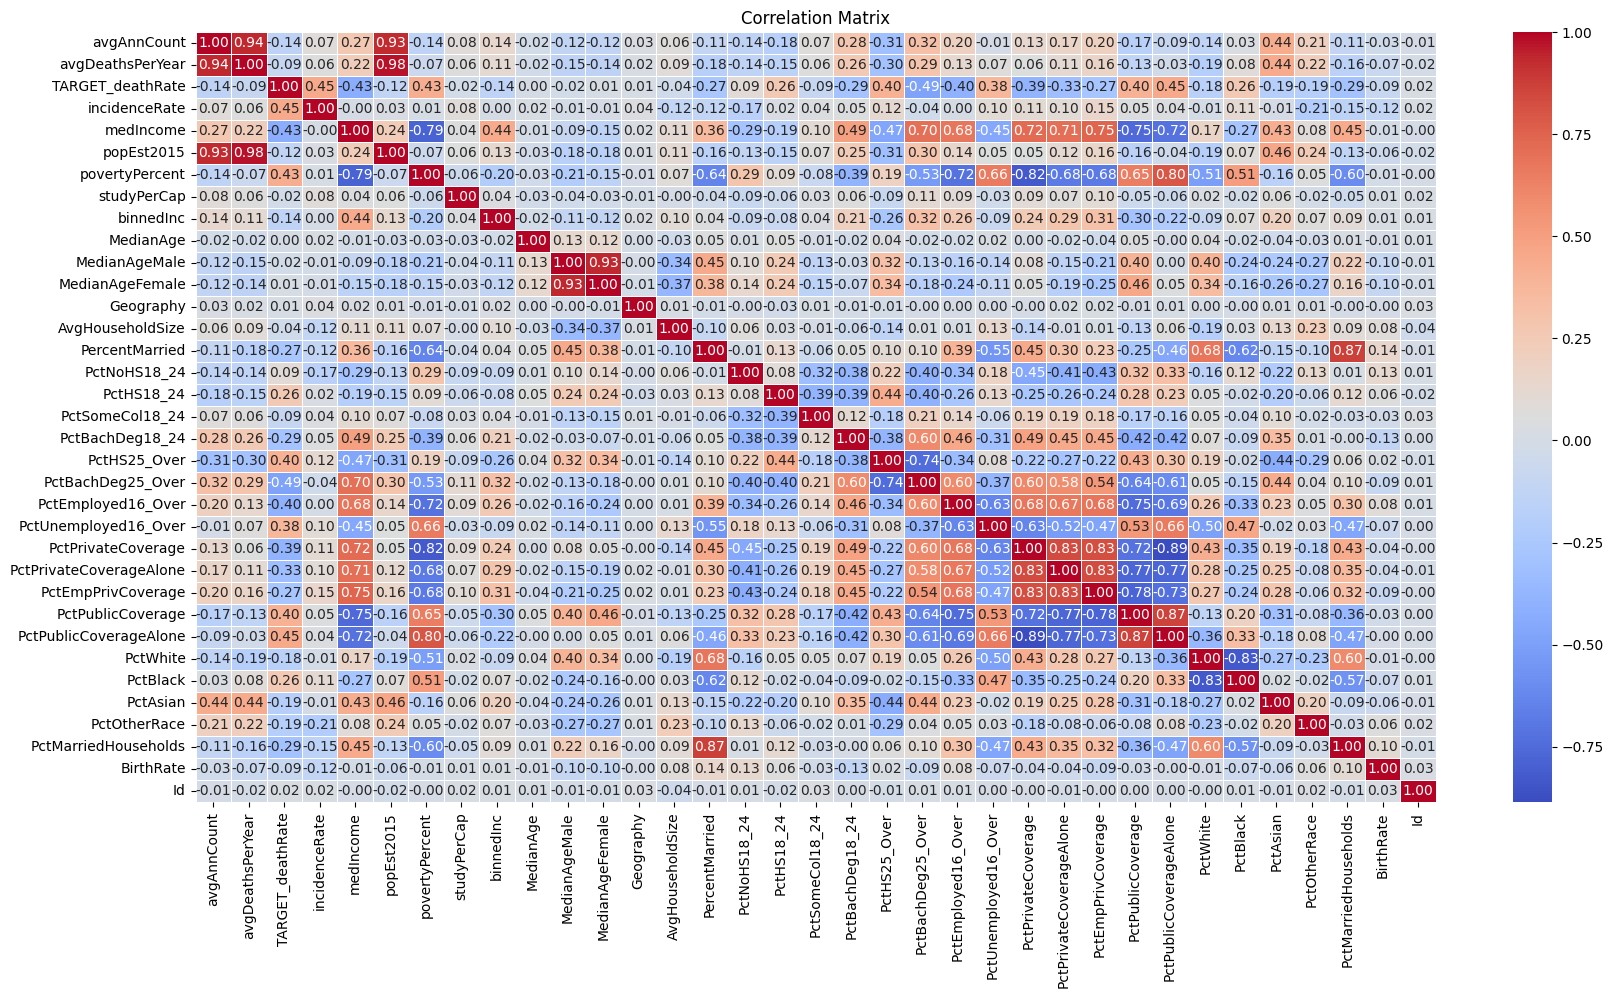

In [28]:
correlation_matrix=df.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


**III. povertyPercent**


**3.1. Plot the variable**

In [29]:
import altair as alt

In [30]:
X=df['povertyPercent'].values

In [31]:
y=df['TARGET_deathRate'].values

In [32]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [33]:
scatter_chart = alt.Chart(pd.DataFrame({'x':X_train, 'y': y_train})).mark_circle(opacity=1, color='red').encode(
    x='x',
    y='y'
  )
scatter_chart

alt.Chart(...)


**3.2. ACCESS BASELINE MODEL**

**3.2.1.Find the average of the target variable**

In [34]:
y_mean = y_train.mean()

**3.2.2.Create a numpy array called y_base filled with this value**

In [35]:
import numpy as np

In [36]:
y_base = np.full(y_train.shape, y_mean)

**3.2.3.Import the MSE and MAE from sklearn**

In [37]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

**3.2.4.Display the MSE and MAE scores of this baseline model**

In [38]:
print(mse(y_train, y_base, squared=True))
print(mae(y_train, y_base))

787.6532204726859
21.527849786209174


**3.3. TRAINING UNIVARIATE LINEAR REGRESSION (medIncome)**

**3.3.1.Import train_test_split from sklearn.model_selection**

In [39]:
from sklearn.model_selection import train_test_split

**3.3.2.Instantiate the LinearRegression class into a variable called reg**

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
reg = LinearRegression()

**3.3.3.Fit the model with the all features:**

In [42]:
reg.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

**3.3.4.Use the trained model to predict the outcome on X_train and save them into y_train_preds**

In [44]:
y_train_preds = reg.predict(X_train.reshape(-1, 1))

In [43]:
y_train

array([189. , 199.1, 205. , ..., 224.2, 148.2, 176.7])

In [45]:
line_chart = alt.Chart(pd.DataFrame({'x':X_train, 'y': y_train_preds})).mark_line(opacity=1, color='blue').encode(
    x='x',
    y='y'
  )
line_chart

alt.Chart(...)

**3.3.5.Calculate the MSE and MAE on the training datasets**

In [46]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [47]:
print(mse(y_train, y_train_preds, squared=True))
print(mae(y_train, y_train_preds))

637.1539620608706
19.04930277716211


**3.3.6.Display the predictions versus the target line charts on the training set**

In [48]:
scatter_chart+line_chart

alt.LayerChart(...)

**3.3.7.Display the predictions versus the target line charts on the testing set**

In [49]:
y_test_preds = reg.predict(X_test.reshape(-1, 1))

In [51]:
print(mse(y_test, y_test_preds, squared=True))
print(mae(y_test, y_test_preds))

614.320161834385
18.843450064575244


In [50]:
scatter_chart = alt.Chart(pd.DataFrame({'x':X_test, 'y': y_test})).mark_circle(opacity=1, color='red').encode(
    x='x',
    y='y'
  )
scatter_chart

alt.Chart(...)

In [52]:
line_chart = alt.Chart(pd.DataFrame({'x':X_test, 'y': y_test_preds})).mark_line(opacity=1, color='blue').encode(
    x='x',
    y='y'
  )
line_chart

alt.Chart(...)

In [53]:
scatter_chart+line_chart

alt.LayerChart(...)

**3.3.8.Display coefficient and intercept**

In [54]:
coef=reg.coef_
intercept=reg.intercept_

In [55]:
print("Intercept:"+str(float(intercept)))
print(str('povertyPercent')+": "+ "coef: " +str(coef[0]))

Intercept:147.18001748223008
povertyPercent: coef: 1.8795706471905735



**IV. medIncome**


**4.1. Plot the variable**

In [56]:
X=df['medIncome'].values

In [57]:
y=df['TARGET_deathRate'].values

In [58]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [59]:
scatter_chart = alt.Chart(pd.DataFrame({'x':X_train, 'y': y_train})).mark_circle(opacity=1, color='red').encode(
    x='x',
    y='y'
  )
scatter_chart

alt.Chart(...)


**4.2. ACCESS BASELINE MODEL**

**4.2.1.Find the average of the target variable**

In [60]:
y_mean = y_train.mean()

**4.2.2.Create a numpy array called y_base filled with this value**

In [61]:
import numpy as np

In [62]:
y_base = np.full(y_train.shape, y_mean)

**4.2.3.Import the MSE and MAE from sklearn**

In [63]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

**4.2.4.Display the MSE and MAE scores of this baseline model**

In [64]:
print(mse(y_train, y_base, squared=True))
print(mae(y_train, y_base))

787.6532204726859
21.527849786209174


**4.3. TRAINING UNIVARIATE LINEAR REGRESSION (medIncome)**

**4.3.1.Import train_test_split from sklearn.model_selection**

In [65]:
from sklearn.model_selection import train_test_split

**4.3.2.Instantiate the LinearRegression class into a variable called reg**

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
reg = LinearRegression()

**4.3.3.Fit the model with the all features:**

In [68]:
reg.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

**4.3.4.Use the trained model to predict the outcome on X_train and save them into y_train_preds**

In [69]:
y_train_preds = reg.predict(X_train.reshape(-1, 1))

In [70]:
y_train

array([189. , 199.1, 205. , ..., 224.2, 148.2, 176.7])

In [71]:
line_chart = alt.Chart(pd.DataFrame({'x':X_train, 'y': y_train_preds})).mark_line(opacity=1, color='blue').encode(
    x='x',
    y='y'
  )
line_chart

alt.Chart(...)

**4.3.5.Calculate the RMSE and MAE on the training datasets**

In [72]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [73]:
print(mse(y_train, y_train_preds, squared=True))
print(mae(y_train, y_train_preds))

650.4162829417609
19.134274373207973


**4.3.6.Display the predictions versus the target line charts on the training set**

In [74]:
scatter_chart+line_chart

alt.LayerChart(...)

**4.3.7.Display the predictions versus the target line charts on the testing set**

In [75]:
y_test_preds = reg.predict(X_test.reshape(-1, 1))

In [76]:
print(mse(y_test, y_test_preds, squared=True))
print(mae(y_test, y_test_preds))

595.6315768325895
18.598193107244693


In [77]:
scatter_chart = alt.Chart(pd.DataFrame({'x':X_test, 'y': y_test})).mark_circle(opacity=1, color='red').encode(
    x='x',
    y='y'
  )
scatter_chart

alt.Chart(...)

In [78]:
line_chart = alt.Chart(pd.DataFrame({'x':X_test, 'y': y_test_preds})).mark_line(opacity=1, color='blue').encode(
    x='x',
    y='y'
  )
line_chart

alt.Chart(...)

In [79]:
scatter_chart+line_chart

alt.LayerChart(...)

**4.3.8.Display coefficient and intercept**

In [80]:
coef=reg.coef_
intercept=reg.intercept_

In [81]:
print("Intercept:"+str(float(intercept)))
print(str('medIncome')+": "+ "coef: " +str(coef[0]))

Intercept:225.673824033698
medIncome: coef: -0.0009948307503424147
